In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [ ]:
features = pd.read_excel('features_1.xlsx')

features

,Unnamed: 0,contrast,dissimilarity,homogeneity,ASM,energy,Label,Unnamed: 7,contrast.1,dissimilarity.1,homogeneity.1,ASM.1,energy.1,Unnamed: 13
0,0,12769357,562393,2747.881680,312782,559.269166,0,NaN,1.137901e+07,520695.140000,3139.132210,3.585647e+05,594.820786,quebra
1,1,9580203,482361,3307.995564,289038,537.622544,0,NaN,3.818199e+05,91542.516667,14077.149180,4.476131e+06,2067.330784,inclusão
2,2,10928946,517098,3084.553772,337650,581.076587,0,NaN,9.701245e+06,449447.623333,5721.048706,1.576351e+07,2404.479182,manchas
3,3,12465011,556457,2776.650206,372854,610.617720,0,NaN,2.296732e+06,210095.453333,9282.596266,1.294473e+07,2222.867379,corrosao por pite
4,4,6088850,375354,4293.162968,371518,609.522764,0,NaN,2.210379e+06,231534.090000,6393.583508,1.366001e+06,1151.400414,carepa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,878418,124428,11710.060699,2728618,1651.852899,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,1796,477005,93119,14425.559150,3308128,1818.825995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,1797,1400820,151900,10458.336605,1487772,1219.742596,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,1798,368408,91122,13919.297455,3666654,1914.850908,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features = features.drop(columns=['Unnamed: 0'])
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)
features

,contrast,dissimilarity,homogeneity,ASM,energy,Label,Unnamed: 7,contrast.1,dissimilarity.1,homogeneity.1,ASM.1,energy.1,Unnamed: 13,defeitos
0,12769357,562393,2747.881680,312782,559.269166,0,NaN,1.137901e+07,520695.140000,3139.132210,3.585647e+05,594.820786,quebra,Quebra
1,9580203,482361,3307.995564,289038,537.622544,0,NaN,3.818199e+05,91542.516667,14077.149180,4.476131e+06,2067.330784,inclusão,Quebra
2,10928946,517098,3084.553772,337650,581.076587,0,NaN,9.701245e+06,449447.623333,5721.048706,1.576351e+07,2404.479182,manchas,Quebra
3,12465011,556457,2776.650206,372854,610.617720,0,NaN,2.296732e+06,210095.453333,9282.596266,1.294473e+07,2222.867379,corrosao por pite,Quebra
4,6088850,375354,4293.162968,371518,609.522764,0,NaN,2.210379e+06,231534.090000,6393.583508,1.366001e+06,1151.400414,carepa,Quebra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,878418,124428,11710.060699,2728618,1651.852899,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1796,477005,93119,14425.559150,3308128,1818.825995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1797,1400820,151900,10458.336605,1487772,1219.742596,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1798,368408,91122,13919.297455,3666654,1914.850908,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais


In [ ]:
X = features.iloc[:,0:5]
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 7)
K_value = 6
neigh = KNeighborsClassifier(n_neighbors=K_value, weights='uniform', algorithm='auto')
neigh.fit(X_treino, Y_treino)
testt=neigh.predict(X_teste)
scoree=accuracy_score(Y_teste, testt)
print("KNN testing accuracy=",scoree*100)

KNN testing accuracy= 75.83333333333333


In [ ]:
features

,contrast,dissimilarity,homogeneity,ASM,energy,Label,Unnamed: 7,contrast.1,dissimilarity.1,homogeneity.1,ASM.1,energy.1,Unnamed: 13,defeitos
0,12769357,562393,2747.881680,312782,559.269166,0,NaN,1.137901e+07,520695.140000,3139.132210,3.585647e+05,594.820786,quebra,Quebra
1,9580203,482361,3307.995564,289038,537.622544,0,NaN,3.818199e+05,91542.516667,14077.149180,4.476131e+06,2067.330784,inclusão,Quebra
2,10928946,517098,3084.553772,337650,581.076587,0,NaN,9.701245e+06,449447.623333,5721.048706,1.576351e+07,2404.479182,manchas,Quebra
3,12465011,556457,2776.650206,372854,610.617720,0,NaN,2.296732e+06,210095.453333,9282.596266,1.294473e+07,2222.867379,corrosao por pite,Quebra
4,6088850,375354,4293.162968,371518,609.522764,0,NaN,2.210379e+06,231534.090000,6393.583508,1.366001e+06,1151.400414,carepa,Quebra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,878418,124428,11710.060699,2728618,1651.852899,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1796,477005,93119,14425.559150,3308128,1818.825995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1797,1400820,151900,10458.336605,1487772,1219.742596,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais
1798,368408,91122,13919.297455,3666654,1914.850908,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marcas Superficiais


In [ ]:
X = features.iloc[:,0:5]
X = preprocessing.scale(X)

#X = X.T
#X = preprocessing.normalize(X)
#X = X.T

# Para esse caso, normalizar resultou em resultados iguais ao de "escalar" os dados.

from sklearn import preprocessing

Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 7)

#from sklearn.preprocessing import StandardScaler
#X_padrao = StandardScaler().fit(X_treino)
#X_p_treino = X_padrao.transform(X_treino)
#X_p_teste = X_padrao.transform(X_teste)

K_value = 6
neigh = KNeighborsClassifier(n_neighbors=K_value, weights='uniform', algorithm='auto')
neigh.fit(X_treino, Y_treino)
testt=neigh.predict(X_teste)
scoree=accuracy_score(Y_teste, testt)
print("KNN testing accuracy=",scoree*100)

KNN testing accuracy= 86.66666666666667


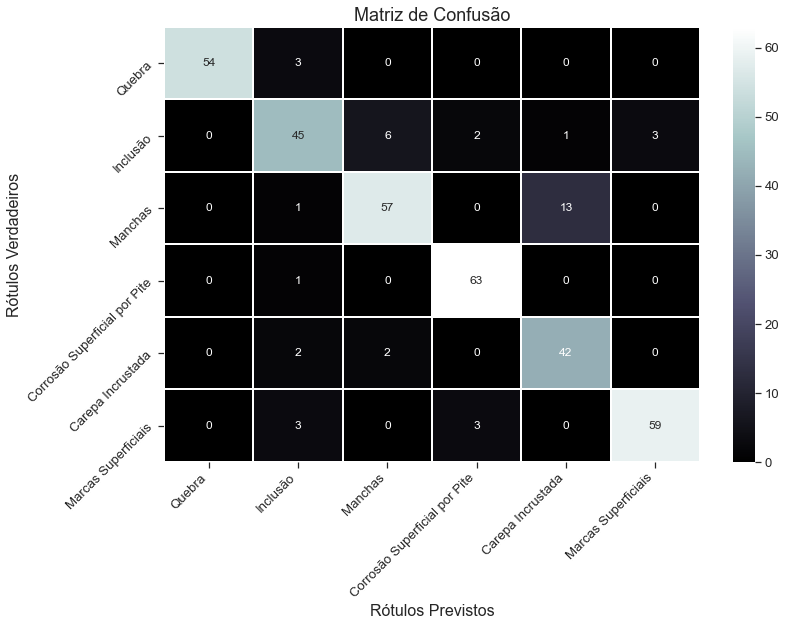

In [ ]:
import matplotlib.pyplot as plt

pred = neigh.predict(X_teste)

c_matrix = confusion_matrix(testt2, Y_teste)

ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 12}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'n_neighbors': [3, 6, 12, 15, 20],
}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_KNN.fit(X_treino, Y_treino)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.2s finished


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 6, 12, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
grid_KNN.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
testt2=grid_KNN.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("KNN testing accuracy=",scoree2*100)

KNN testing accuracy= 88.88888888888889


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [2, 3, 4, 5, 6, 10, 12, 15, 20],
}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_KNN.fit(X_treino, Y_treino)

testt2=grid_KNN.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("KNN testing accuracy=",scoree2*100)
grid_KNN.best_estimator_

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.6s


KNN testing accuracy= 88.88888888888889


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    8.5s finished


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [2, 3, 4, 5, 6, 10, 12, 15, 20],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70],
}
grid_KNN = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_KNN.fit(X_treino, Y_treino)

testt2=grid_KNN.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("KNN testing accuracy=",scoree2*100)
grid_KNN.best_estimator_

Fitting 4 folds for each of 1512 candidates, totalling 6048 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 6048 out of 6048 | elapsed: 25.1min finished


KNN testing accuracy= 88.88888888888889


KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=3,
                     weights='distance')